### 과제 1: 수도권 vs 지방 부동산 시장 비교 분석
수도권(서울, 경기, 인천)과 주요 지방 광역시의 부동산 가격 변동 패턴을 비교 분석하고, 지역별 시장 특성과 투자 매력도를 평가하세요.
### 과제 2: 아파트 규모별 가격 트렌드 및 생애주기 투자 전략
전용면적별(소형, 중형, 대형) 아파트의 가격 변동 추이를 분석하고, 생애주기에 따른 최적 투자 전략과 거주 전략을 데이터 기반으로 제시하세요.
### 과제 3: 부동산 거래량과 가격의 선행지표 관계 분석
부동산 거래량 변화가 가격 변동에 미치는 영향을 시차 분석을 통해 파악하고, 시장 전환점을 예측할 수 있는 지표를 개발하세요.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 로드 (헤더 스킵)
try:
    df = pd.read_csv('아파트(매매)_실거래가.csv', encoding='cp949', header=15)
except UnicodeDecodeError:
    df = pd.read_csv('아파트(매매)_실거래가.csv', encoding='utf-8', header=15)

# 데이터 전처리
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(',', '').astype(int)
df['계약년월일'] = df['계약년월'].astype(str) + df['계약일'].astype(str).str.zfill(2)
df['계약년월일'] = pd.to_datetime(df['계약년월일'], format='%Y%m%d')
df['YearMonth'] = df['계약년월일'].dt.to_period('M')

# 과제 2: 아파트 규모별 가격 트렌드 분석
def categorize_size(area):
    if area < 60:
        return '소형 (< 60㎡)'
    elif 60 <= area <= 85:
        return '중형 (60-85㎡)'
    else:
        return '대형 (> 85㎡)'

df['규모'] = df['전용면적(㎡)'].apply(categorize_size)
size_price_trend = df.groupby(['YearMonth', '규모'])['거래금액(만원)'].mean().reset_index()
size_price_trend['YearMonth'] = size_price_trend['YearMonth'].astype(str)
size_price_trend['YearMonth'] = pd.to_datetime(size_price_trend['YearMonth'])

In [4]:
from da_utils import profile
data_report = profile.get_data_profile(df)

종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 68725행 x 23열
- 메모리 사용량: 62.20mb
- 수치형 변수: 9개
- 범주형 변수: 12개

2. 결측값 분석
✅ 결측값 없음. 완전

3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,NO,34363.000,19839.343,1.00,68725.000,0.000,-1.200,0.000,100.000
1,본번,625.005,639.889,1.00,4974.000,3.607,20.404,3.662,2.078
2,부번,4.255,34.419,0.00,2837.000,33.509,1946.274,20.947,0.298
3,전용면적(㎡),76.308,28.186,11.33,273.973,1.064,3.367,8.470,9.849
4,계약년월,202479.700,41.401,202408.00,202508.000,-1.089,-0.804,0.000,0.019
5,계약일,16.373,8.545,1.00,31.000,-0.105,-1.118,0.000,0.045
6,거래금액(만원),128514.797,98499.300,6950.00,2500000.000,3.269,24.178,6.596,4.659
7,층,9.784,6.533,-2.00,67.000,1.177,2.721,1.570,0.090
8,건축년도,2003.045,11.482,1965.00,2025.000,-0.081,-0.607,0.308,0.087



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
⚠️
-- 본번: 왜도 = 3.607
-- 부번: 왜도 = 33.509
-- 거래금액(만원): 왜도 = 3.269

- 높은 이상값 비율(>5%)
⚠️
-- 부번: 이상값 20.9%
-- 전용면적(㎡): 이상값 8.5%
-- 거래금액(만원): 이상값 6.6%


=== 종합 이상값 탐지 시스템 ===
1. 일변량 이상값 탐지 (IQR방법)
  거래금액(만원): 4533개 (6.6%)
  전용면적(㎡): 5821개 (8.5%)
  층: 1079개 (1.6%)
  일변량 이상값 없음.

2. 다변량 이상값 탐지 (마할라노비스 거리)


NameError: name 'StandardScaler' is not defined

In [1]:
missing_info = df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:
# 시군구별로 groupby하기
df_groupby = df.groupby('시군구')
df_groupbyprice = df_groupby['거래금액(만원)'].describe()
df2 = df_groupbyprice.sort_values(by='mean',ascending = True)
df_groupbyprice.columns

0        202508
1        202508
2        202508
3        202508
4        202508
          ...  
68720    202408
68721    202408
68722    202408
68723    202408
68724    202408
Name: 계약년월, Length: 68725, dtype: int64

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 로드 (헤더 스킵)
try:
    df = pd.read_csv('아파트(매매)_실거래가.csv', encoding='cp949', header=15)
except UnicodeDecodeError:
    df = pd.read_csv('아파트(매매)_실거래가.csv', encoding='utf-8', header=15)

# '거래금액(만원)' 컬럼의 쉼표 제거 및 숫자형으로 변환
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(',', '').astype(int)

# '계약년월'을 문자열로 변환하고, datetime 객체로 변환하여 시계열 데이터로 만듭니다.
df['계약년월'] = pd.to_datetime(df['계약년월'].astype(str), format='%Y%m')

# '계약년월'을 기준으로 그룹화하고 '거래금액(만원)'의 평균을 계산합니다.
monthly_avg_price = df.groupby('계약년월')['거래금액(만원)'].mean().reset_index()


# ================================================================
# 월별 평균 거래금액 시각화
# ================================================================

# Seaborn 스타일 설정
sns.set_style('whitegrid')

plt.figure(figsize=(14, 7))

# '거래금액(만원)'의 평균을 기준으로 막대 그래프와 선 그래프를 함께 그립니다.
# 막대 그래프는 각 월의 데이터를 직관적으로 보여주고, 선 그래프는 추세를 강조합니다.
ax = sns.barplot(x='계약년월', y='거래금액(만원)', data=monthly_avg_price, color='skyblue', alpha=0.6, label='월별 평균')

# 선 그래프를 추가하여 추세를 더 명확하게 보여줍니다.
# sns.lineplot(x='계약년월', y='거래금액(만원)', data=monthly_avg_price, color='red', marker='o', linewidth=2.5, label='추세선')

# 그래프 제목 및 라벨 설정
plt.title('서울 아파트 월별 평균 거래금액 변동 추이', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('계약년월', fontsize=12)
plt.ylabel('평균 거래금액 (만원)', fontsize=12)

# x축 날짜 포맷 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# 선 그래프에 데이터 포인트 값 표시
for i, row in monthly_avg_price.iterrows():
    ax.text(row['계약년월'], row['거래금액(만원)'] + 2000, f"{row['거래금액(만원)']:.0f}", 
            color='black', ha='center', va='bottom', fontsize=10)

# 범례 추가
plt.legend()
plt.tight_layout()
plt.show()

# 데이터프레임의 상위 5개 행을 출력하여 결과 확인
print("\n=== 월별 평균 거래금액 데이터 (상위 5개) ===")
display(monthly_avg_price.head())

ConversionError: Failed to convert value(s) to axis units: Timestamp('2024-08-01 00:00:00')

Error in callback <function _draw_all_if_interactive at 0x0000019BBD416A20> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: Timestamp('2024-08-01 00:00:00')

ConversionError: Failed to convert value(s) to axis units: Timestamp('2024-08-01 00:00:00')

<Figure size 1400x700 with 1 Axes>

In [ ]:
df2 = df1['거래금액(만원)'].describe()


,count,mean,std,min,25%,50%,75%,max
계약년월,,,,,,,,
202408,3951.0,121214.749177,89034.817906,8200.0,68750.0,96000.0,143000.0,850000.0
202409,3185.0,126198.906750,100875.945401,7300.0,63500.0,93000.0,152000.0,1060000.0
202410,3892.0,121797.449126,100596.969318,7500.0,64000.0,92500.0,143125.0,1700000.0
202411,3501.0,123810.491859,97584.426344,7500.0,63800.0,95000.0,153900.0,860000.0
202412,3353.0,119192.229943,103220.099869,7800.0,58000.0,89500.0,144500.0,1380000.0
202501,3514.0,127420.208879,96493.001192,8300.0,70000.0,100150.0,152000.0,1140000.0
202502,6685.0,147868.646672,115219.320020,7250.0,76700.0,119000.0,180000.0,2500000.0
202503,10420.0,142216.865451,101753.293551,7400.0,78000.0,117000.0,171500.0,1750000.0
202504,5535.0,113232.388618,88694.644953,6950.0,66000.0,92500.0,135000.0,1305000.0


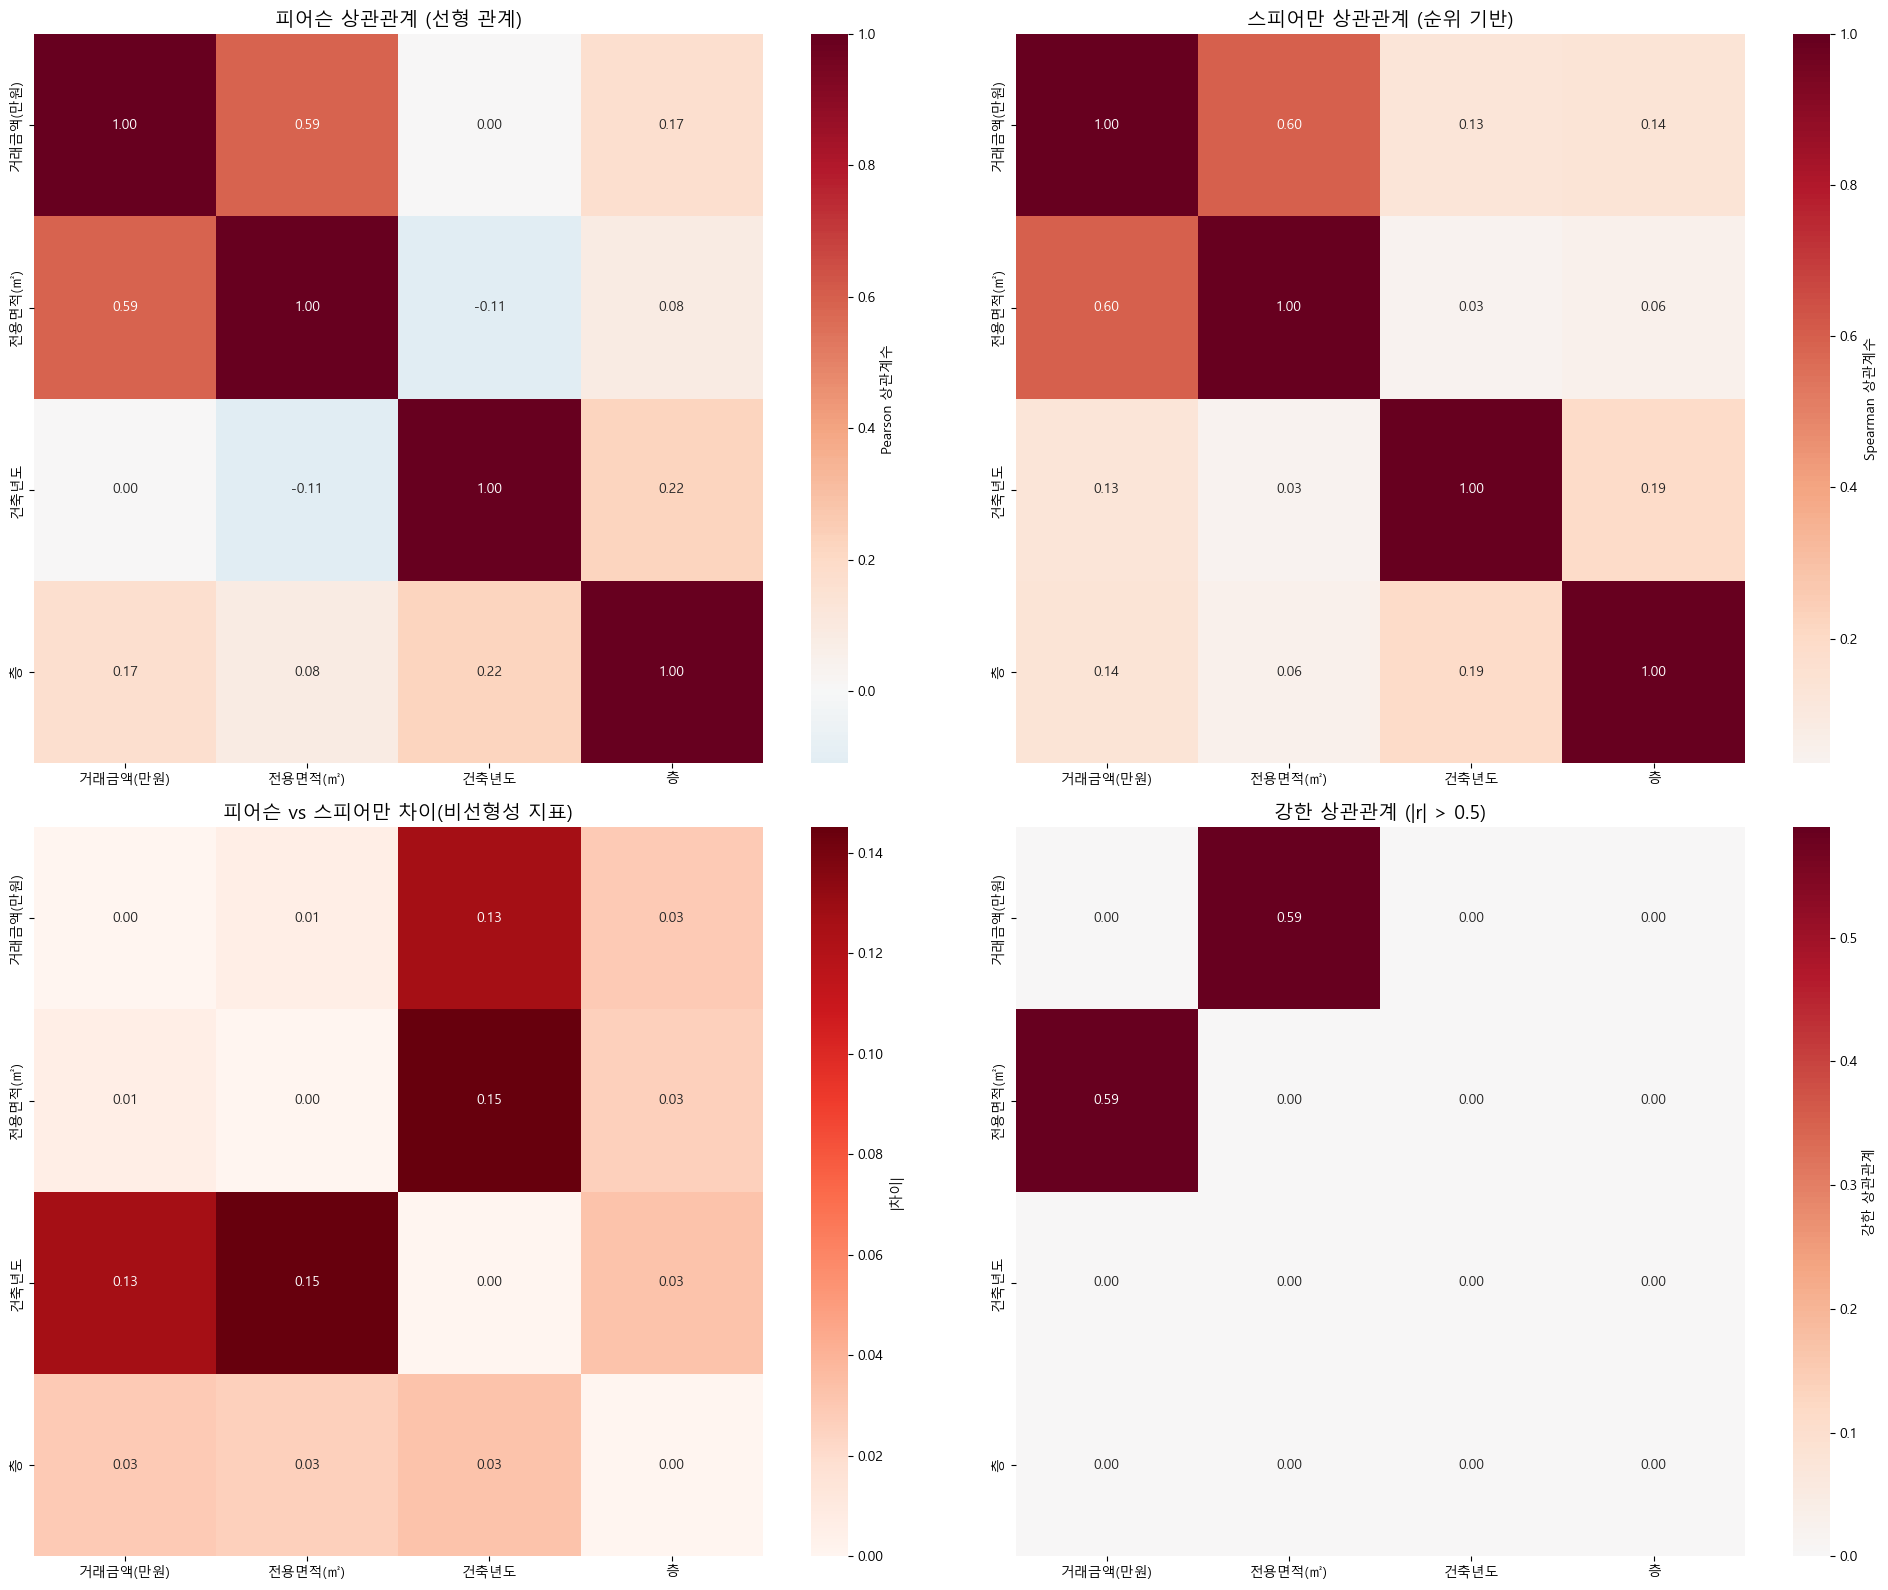

In [21]:


# '층'은 문자열일 수 있으므로 숫자형으로 변환, 변환 불가능한 값은 NaN으로 처리
df['층'] = pd.to_numeric(df['층'], errors='coerce')

# 상관관계 분석에 사용할 수치형 데이터 선택
# '건축년도'는 숫자로 취급하여 분석에 포함
correlation_data = df[['거래금액(만원)', '전용면적(㎡)', '건축년도', '층']]

# 결측값이 있는 행 제거
correlation_data = correlation_data.dropna()


# ================================================================
# 상관관계 분석 및 시각화
# ================================================================
# 피어슨 상관관계 - 선형 관계에 적합
pearson_corr = correlation_data.corr(method='pearson')

# 스피어만 상관관계 - 순위 기반 관계에 적합
spearman_corr = correlation_data.corr(method='spearman')

# 시각화를 위한 서브플롯 설정
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

# 1. 피어슨 상관관계 히트맵
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, ax=a1, cbar_kws={'label': 'Pearson 상관계수'})
a1.set_title('피어슨 상관관계 (선형 관계)', fontsize=14)

# 2. 스피어만 상관관계 히트맵
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, ax=a2, cbar_kws={'label': 'Spearman 상관계수'})
a2.set_title('스피어만 상관관계 (순위 기반)', fontsize=14)

# 3. 피어슨 vs 스피어만 상관계수 차이 히트맵 (비선형성 지표)
corr_diff = abs(spearman_corr - pearson_corr)
sns.heatmap(corr_diff, annot=True, fmt='.2f', cmap='Reds',
            square=True, ax=a3, cbar_kws={'label': '|차이|'})
a3.set_title('피어슨 vs 스피어만 차이(비선형성 지표)', fontsize=14)

# 4. 강한 상관관계 (|r| > 0.5) 네트워크
strong_corr = pearson_corr.copy()
# 절대값이 0.5 미만인 값은 0으로 설정
strong_corr[abs(strong_corr) < 0.5] = 0
# 대각선 값(자기 자신과의 상관관계)은 0으로 설정
np.fill_diagonal(strong_corr.values, 0)
sns.heatmap(strong_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, ax=a4, cbar_kws={'label': '강한 상관관계'})
a4.set_title('강한 상관관계 (|r| > 0.5)', fontsize=14)
    
plt.tight_layout()
plt.show()